<a href="https://colab.research.google.com/github/Naaastenka/Project1/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [ ]:
# Определим распределение anglit -  Непрерывная случайная величина..
sample = sts.anglit()

In [ ]:
def plot_histograms(sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = anglit_rv.rvs(sample_size)
        sample_means.append(np.mean(sample))

In [ ]:
# Сгенерируем выборку
sample_size = 1000
sample = anglit_rv.rvs(sample_size)

In [ ]:
real_mean = anglit_rv.mean()

In [ ]:
real_var = anglit_rv.var()

### Постройте гистограмму выборки и теоретическую плотность распределения

(array([0.09984226, 0.25958988, 0.37940059, 0.4592744 , 0.5391482 ,
        0.4592744 , 0.75880118, 0.75880118, 0.9584857 , 0.93851724,
        0.85864344, 1.13820176, 0.97845415, 1.0383595 , 0.79873808,
        1.15817022, 0.85864344, 0.83867498, 0.91854879, 1.0383595 ,
        0.65895892, 0.91854879, 0.59905356, 0.4592744 , 0.59905356,
        0.59905356, 0.29952678, 0.29952678, 0.19968452, 0.09984226]),
 array([-0.74413592, -0.69405693, -0.64397793, -0.59389894, -0.54381994,
        -0.49374095, -0.44366195, -0.39358296, -0.34350396, -0.29342497,
        -0.24334598, -0.19326698, -0.14318799, -0.09310899, -0.04303   ,
         0.007049  ,  0.05712799,  0.10720699,  0.15728598,  0.20736498,
         0.25744397,  0.30752296,  0.35760196,  0.40768095,  0.45775995,
         0.50783894,  0.55791794,  0.60799693,  0.65807593,  0.70815492,
         0.75823392]),
 <BarContainer object of 30 artists>)

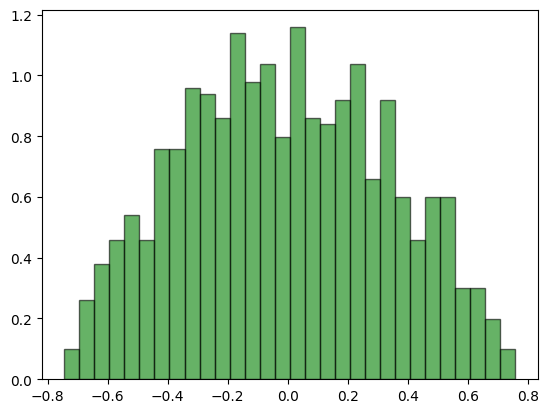

In [ ]:
# Построим гистограмму выборки
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

In [ ]:
# Выборочное среднее и выборочная дисперсия
sample_mean = sample.mean()
sample_var = sample.var()

# Вывод выборочного среднего и дисперсии
print("Выборочное среднее:", sample_mean)
print("Выборочная дисперсия:", sample_var)

Выборочное среднее: -0.012211676951677896
Выборочная дисперсия: 0.11623410461876926


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

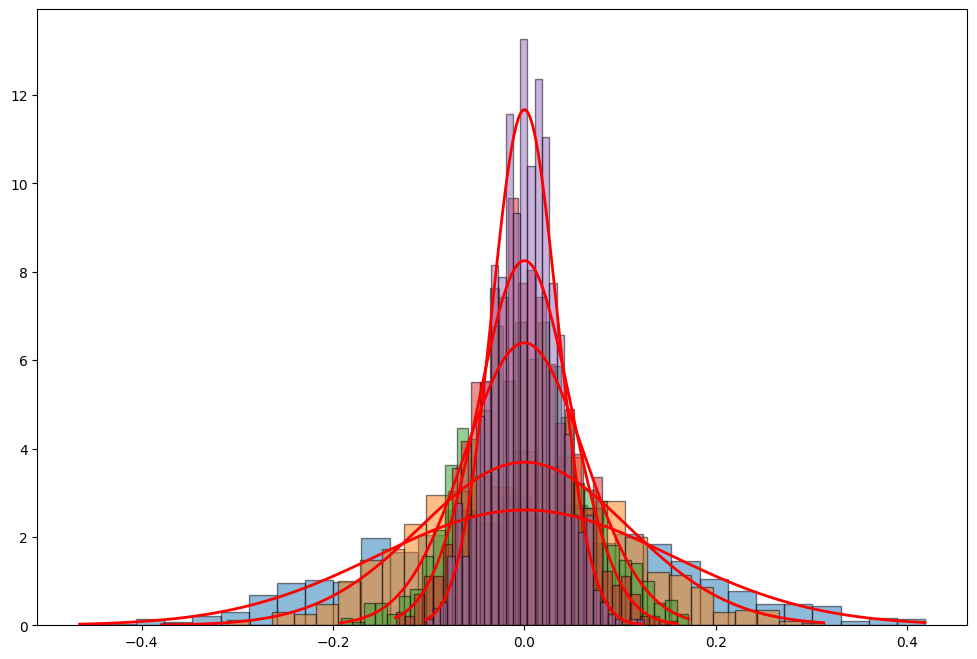

In [ ]:
def plot_sample_means_hist(sample_sizes, num_samples):
    plt.figure(figsize=(12, 8))

    for sample_size in sample_sizes:
        sample_means = []
        for _ in range(num_samples):
            sample = anglit_rv.rvs(sample_size)
            sample_means.append(np.mean(sample))

        # Строим гистограмму выборочных средних
        plt.hist(sample_means, bins=30, density=True, alpha=0.5, edgecolor='black', label=f'Sample size = {sample_size}')

        # Параметры нормального распределения (мат. ожидание и стандартное отклонение)
        mean = real_mean
        std = math.sqrt(real_var / sample_size)

        # Генерируем нормальное распределение с теми же параметрами
        x = np.linspace(min(sample_means), max(sample_means), 100)
        plt.plot(x, sts.norm.pdf(x, mean, std), 'r', lw=2, label=f'Theoretical N({mean:.2f}, {std**2:.2f}) for n={sample_size}')


# Примеры гистограмм для разных размеров выборок
sample_sizes = [5, 10, 30, 50, 100]
num_samples = 1000
plot_sample_means_hist(sample_sizes, num_samples)


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
Гистограммы выборочных средних для различных объемов выборок выглядят симметричными и приближаются к колоколообразной форме, что соответствует нормальному распределению, можно сделать вывод что аппроксимация распределения выборочных среднего по ЦПТ работает хорошо.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.stats.weightstats import _zconfint_generic

In [ ]:
# Загружаем данные
url = "https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df = pd.read_csv(url)

# Отображаем первые несколько строк датафрейма
display(df.head())

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Проверяем уникальные значения в колонке 'churn'
print("Уникальные значения в колонке 'churn':", df['churn'].unique())

Уникальные значения в колонке 'churn': [False  True]


In [ ]:
# Проверяем названия колонок
print("Названия колонок:", df.columns)

# Проверяем наличие пустых значений в колонках 'churn' и 'total day calls'
print("Проверка на наличие пустых значений:")
print(df[['churn', 'total day calls']].isnull().sum())

Названия колонок: Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
Проверка на наличие пустых значений:
churn              0
total day calls    0
dtype: int64


In [ ]:
# Разделяем данные на две группы по колонке churn
churn_yes = df[df['churn'] == True]['total day calls']
churn_no = df[df['churn'] == False]['total day calls']

In [ ]:
# Функция для вычисления доверительных интервалов
def calculate_confidence_intervals(data, alpha=0.05):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)

    # Z-интервал вручную
    z_score = sts.norm.ppf(1 - alpha/2)
    margin_of_error = z_score * (std / np.sqrt(n))
    ci_manual = (mean - margin_of_error, mean + margin_of_error)

    # Z-интервал с помощью _zconfint_generic
    ci_statsmodels = _zconfint_generic(mean, std/np.sqrt(n), alpha, 'two-sided')

    return ci_manual, ci_statsmodels

In [ ]:
# Вычисляем доверительные интервалы для каждой группы
ci_churn_yes_manual, ci_churn_yes_statsmodels = calculate_confidence_intervals(churn_yes)
ci_churn_no_manual, ci_churn_no_statsmodels = calculate_confidence_intervals(churn_no)

In [ ]:
# Отображаем результаты
print("Доверительный интервал для ушедших клиентов (вручную):", ci_churn_yes_manual)
print("Доверительный интервал для ушедших клиентов (statsmodels):", ci_churn_yes_statsmodels)
print("Доверительный интервал для оставшихся клиентов (вручную):", ci_churn_no_manual)
print("Доверительный интервал для оставшихся клиентов (statsmodels):", ci_churn_no_statsmodels)

Доверительный интервал для ушедших клиентов (вручную): (99.41066229112079, 103.26014516229537)
Доверительный интервал для ушедших клиентов (statsmodels): (99.41066229112079, 103.26014516229537)
Доверительный интервал для оставшихся клиентов (вручную): (99.55618833318324, 101.01012745629045)
Доверительный интервал для оставшихся клиентов (statsmodels): (99.55618833318324, 101.01012745629045)
